<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)
df.head(10)


,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short
5,5,Kodanda Rami Reddy,A.,Abhilasha (1983/I),1983,NaN,Thriller
6,6,Kodanda Rami Reddy,A.,Anubandham,1984,NaN,Drama
7,7,Kodanda Rami Reddy,A.,Anubandham,1984,NaN,Romance
8,8,Kodanda Rami Reddy,A.,Athaku Yamudu Ammayiki Mogudu,1989,NaN,Action
9,9,Kodanda Rami Reddy,A.,Athaku Yamudu Ammayiki Mogudu,1989,NaN,Comedy


### Clean the dataset 
---


In [2]:
df_cleaned = df
df_cleaned= df_cleaned.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB


### Ideas for cleaning the data


1.   Remove the unnamed column as it is just an index that not needed.
2.   Make sure that there are no spaces " " in the columns
3. Sort by genre or year.
4. Remove films with no ranking - to reduce the size.

### Decided only rank needed to be cleaned up.








### How many movies of each genre are there?
---

In [3]:
#Using the full dataframe to get numbers of films per genre (there are overlaps as one film has many genres)
#Hence why drop duplicates (name)is used further down.
genres = df["genre"].value_counts()

print(genres)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

In [4]:
# drop duplicates of movie name as many genres are associated with one film
directors = df_cleaned.drop_duplicates(["name"])
#Create a new column with full name of director from first and last. 
directors["fullname"] = df_cleaned["first_name"] + " " + df_cleaned["last_name"]
directors = directors.drop(columns = ["first_name", "last_name"])
#find the average rating of each director and then sort descending.
directors_rank = directors.groupby(["fullname"])["rank"].mean()
dir_toprank = directors_rank.sort_values(ascending = False)
print(dir_toprank.head(10))

fullname
Arünas Zebriünas       9.9
William T. Hurtz       9.9
Scott Barkan           9.9
Matthew Crandall       9.9
Kirsten Tretbar        9.9
Andrew Cappelletti     9.9
Debs Tarrier           9.9
Djordje Kadijevic      9.8
François Miron         9.8
Takis Kanellopoulos    9.8
Name: rank, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### How many movies have ranks of over 9?
---


In [5]:
#Dropped duplicates of movie names as they have multiple entries due to genre column.
df_dropdups = df_cleaned.drop_duplicates(["name"])
top_movie_count = df_dropdups[df_dropdups["rank"] >= 9].count()
#from cheat sheet-> df[df['column name'] == value] 
print(top_movie_count[5])

1021


### Plot a bar chart of mean rank and genre
---

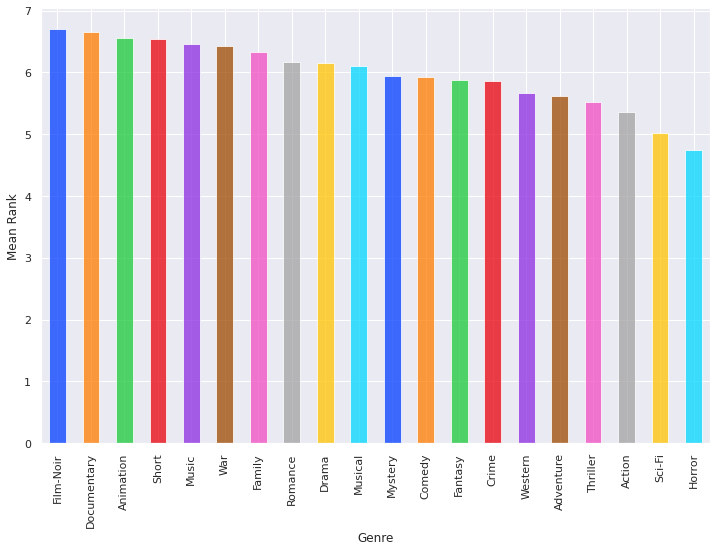

In [39]:
# copied from Jay
#notice we didn't drop duplicates here because we would lose genre data!
rank_by_genre = df_cleaned.groupby('genre')['rank'].mean()
rank_by_genre = rank_by_genre.sort_values( ascending = False)
sns.set(rc={'figure.figsize':(12,8)})
colors = sns.color_palette('bright')
bar_plot = rank_by_genre.plot(x="genre", y=rank_by_genre, kind="bar", alpha=0.75, rot=90, color = colors)
bar_plot.set_xlabel("Genre")
bar_plot.set_ylabel("Mean Rank");


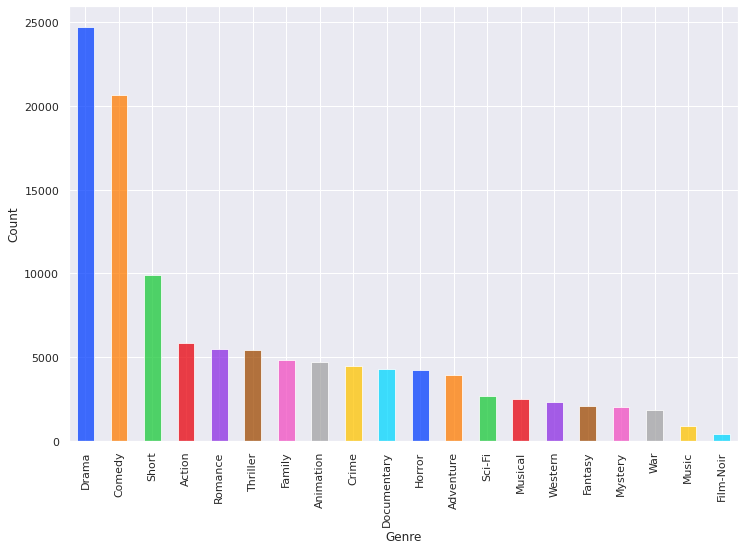

In [40]:
count_by_genre = df_cleaned.groupby('genre')['rank'].count()
count_by_genre = count_by_genre.sort_values( ascending = False)
bar_plot = count_by_genre.plot(x="genre", y=count_by_genre, kind="bar", alpha=0.75, rot=90, color = colors)
bar_plot.set_xlabel("Genre")
bar_plot.set_ylabel("Count");

### Plot a pie chart of how many movies of each genre there are 
---


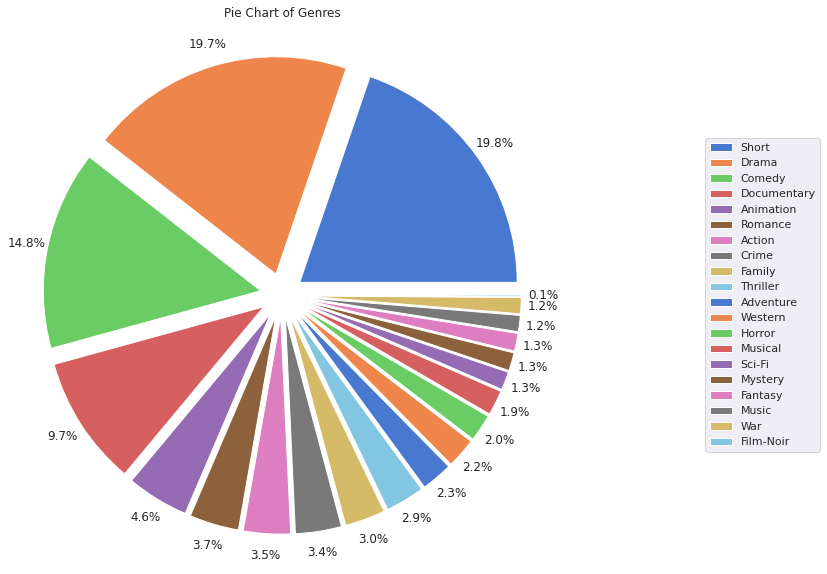

In [41]:
#Plot a Pie chart of genres
colors = sns.color_palette('muted')
labels = genres.keys()
sns.set(rc={'figure.figsize':(10,10)})
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(genres, colors = colors, pctdistance=1.1, labeldistance=1.2, explode = explode, autopct='%1.1f%%')
plt.title("Pie Chart of Genres")
plt.legend(labels, bbox_to_anchor=(1.5,0.5), loc="right")
plt.show()

### Plot a graph showing the mean Rank for each year 

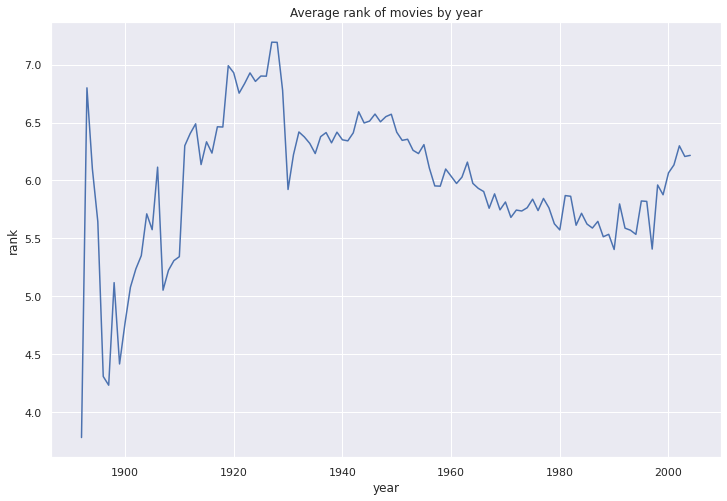

In [43]:
rank_by_year = df_cleaned.groupby('year')['rank'].mean()
#print(rank_by_year)
#plot the chart of the data means 
sns.set(rc={'figure.figsize':(12,8)})
chart = sns.lineplot(data=rank_by_year, palette = colors)
plt.title("Average rank of movies by year")
sns.set_style("whitegrid")

### This graph shows the highest ranked movies were made in the 1920's 🤩

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  Try ranking the directors by rating but also number of movies made. (extra challenge - find highest ranked director by genre)
2.  write a function to return list of movies for a given director.
3.  return a count of list of modern movies > 2000 to compare with Jay's count of movies released before 2000.
4. plot total number of movies each year.

### Complete the tasks you have set out in the exercise above. 
---


Task 1 is based on Jay's original workings above, though I will try to do it myself before asking for help.

In [10]:
import matplotlib.pyplot as plt

#Task 1 - Rank the directors by their movie ratings and the number of movies they have directed.
#Take a copy of the df with all non values dropped.
directors = df_cleaned

#create a new column with fullname in - concatenated from two columns, then remove the original columns.
directors["fullname"] = directors["first_name"] + " " + directors["last_name"]
directors = directors.drop(columns = ["first_name", "last_name"])
directors_name = directors["fullname"]
#print(directors_name)
directors.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   name        113376 non-null  object 
 2   year        113376 non-null  int64  
 3   rank        113376 non-null  float64
 4   genre       113376 non-null  object 
 5   fullname    113376 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 10.1+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Now create a dataframe from the directors df and include the statistics on their rankings.
def make_dataframe(df):
  #group the directors ranks by their fullnames.
  directors_rank_ave = df.groupby(["fullname"])["rank"].mean()
  #print(directors_rank_ave)
  directors_rank_median = df.groupby(["fullname"])["rank"].median()
  #print(directors_rank_median)
  directors_movie_names = directors.groupby(["fullname"])["name"]
  directors_movie_count = directors_movie_names.count() 

  #create new dataframe with above statistics from df_filtered.
  directors_movie_names_series = pd.Series(directors_movie_names)
  directors_rank_ave_series = pd.Series(directors_rank_ave)
  directors_rank_median_series = pd.Series(directors_rank_median)
  directors_movie_count_series = pd.Series(directors_movie_count)

  frame = {"Directors average rank": directors_rank_ave_series, "Directors median rank": directors_rank_median_series, "Directors movie total": directors_movie_count_series }
  new_dataframe =  pd.DataFrame(frame)
  
  return(new_dataframe)

new_dataframe = make_dataframe(directors)

new_dataframe.head(10)


,Directors average rank,Directors median rank,Directors movie total
fullname,,,
'Philthy' Phil Phillips,5.700000,5.7,1
A. (I) Abramov,6.900000,6.9,1
A. Bhimsingh,6.971429,6.1,7
A. Charles Addessi,4.200000,4.2,1
A. Dean Bell,5.333333,6.4,3
A. Edward Sutherland,6.265385,6.4,52
A. Hans Scheirl,6.000000,6.0,2
A. Jonathan Benny,8.557143,8.6,14
A. Razak Mohaideen,3.100000,3.1,1


In [12]:
#sort by rank and count of movies
top_directors = new_dataframe.sort_values(["Directors movie total", "Directors average rank"], ascending = (False, False))
top_directors.head(10)

,Directors average rank,Directors median rank,Directors movie total
fullname,,,
Friz Freleng,6.718341,6.8,1025
Chuck (I) Jones,6.944614,7.0,984
Dave Fleischer,5.974526,5.9,738
Robert McKimson,6.475897,6.5,697
Tex Avery,7.029077,6.9,509
William (I) Hanna,6.518496,6.6,492
Joseph Barbera,6.538763,6.6,485
Robert Clampett,7.181212,7.1,330
Jack Kinney,6.591829,6.5,257


In [13]:
#Created a function to filter the original df by genre input by the user, then run the function from above to 
#create a new df with mean and count of movies on just one genre.

def filtered_by_genre(df):
  print(genres)
  genre = input("Input a genre from above list(case sensitive): ")
  filtered_df = df[df['genre'] == genre]
  #filtered_df = df[df['column name' == value]] - from cheat sheet
  filtered_df
  return filtered_df


#Run function and assign output to filtered_df
filtered_df = filtered_by_genre(df_cleaned)
#Run function to create a new dataframe that will display the average rating for each director in the user's chosen genre.
new_dataframe = make_dataframe(filtered_df)
new_dataframe = new_dataframe.sort_values(["Directors average rank", "Directors movie total"], ascending = (False, False))
new_dataframe.head(10)


Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64
Input a genre from above list(case sensitive): Drama


,Directors average rank,Directors median rank,Directors movie total
fullname,,,
Chris Eska,9.8,9.8,3
Takis Kanellopoulos,9.8,9.8,3
Djordje Kadijevic,9.8,9.8,2
Jung S. Ha,9.8,9.8,2
Lloyd A. Silverman,9.8,9.8,1
Jay Woelfel,9.7,9.7,14
Sean (II) Ellis,9.7,9.7,4
Ilker Canikligil,9.7,9.7,3
Jim (IV) Fitzpatrick,9.7,9.7,3


In [14]:
#task 2 Write a function to return a list of all movies by a given director

def get_movies(df, fullname):
  list_of_movies = df[df["fullname"] == fullname].drop_duplicates(["name"])
  return list_of_movies

list_of_movies = get_movies(directors, "Quentin Tarantino")
movies = list_of_movies["name"]
print(movies)

328559                   Four Rooms
328564                 Jackie Brown
328567            Kill Bill: Vol. 1
328570            Kill Bill: Vol. 2
328574    My Best Friend's Birthday
328576                 Pulp Fiction
328578               Reservoir Dogs
Name: name, dtype: object


In [15]:
# task 3 Count of movies released after year 2000
this_century = df_cleaned[df_cleaned["year"] >= 2000].count()
print(this_century)

past_century = df_cleaned[df_cleaned["year"] < 2000].count()
print(past_century)

Unnamed: 0    20378
first_name    20378
last_name     20378
name          20378
year          20378
rank          20378
genre         20378
fullname      20378
dtype: int64
Unnamed: 0    92998
first_name    92998
last_name     92998
name          92998
year          92998
rank          92998
genre         92998
fullname      92998
dtype: int64


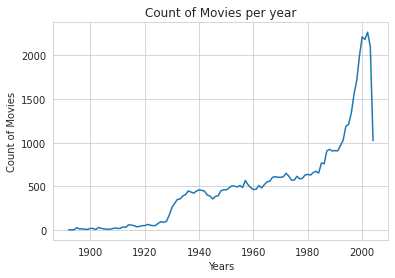

In [16]:
#Task 4 Plot the total number of movies by year.
remove_duplicates = df_cleaned.drop_duplicates(["name"])
count_by_year = remove_duplicates.groupby('year')["name"].count()
#plot the chart of the data counts using seaborn 
plt.title("Count of Movies per year")
plt.xlabel("Years")
plt.ylabel("Count of Movies")
chart = sns.lineplot(data=count_by_year)
sns.set_style("whitegrid")


# Reflection
----

## What skills have you demonstrated in completing this notebook?

We pulled together some of the previous worksheets on Pandas for this project. We use droping null values, filtering on columns and grouping by another. Plotting tools like pie charts and line graphs. Working with another person was helpful for me as I often can't get started quickly and sometimes can't see the typos or missing brackets easily.

## What caused you the most difficulty?

Your answer: Jay and I worked together on this mini project, although Jay was well ahead of me when I started. It took me a while to catch up but Jay was patient and helped when I was really stuck. Mostly, I get stuck on syntax and what command to use sometimes. I struggled with the filtering functions still which is very frustrating to me. I will try and practice this more.